In [8]:
# Importing libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image
import functions
from GP_action import GP_action
import time
import imageio

In [9]:
Noise= True# Specify if noisy or not
Noise_level= 0.05 # if noisy, what is the noise sd
'''If the scaled X and Y is being used rememeber to scale the noise as well'''

'If the scaled X and Y is being used rememeber to scale the noise as well'

In [10]:
# The target function is assigned, chose 1 from the below
objective=functions.Shubert()
objective=functions.Branin()
objective=functions.Hartmann_6()
objective=functions.Hartmann_3()
objective=functions.Ackley()
objective=functions.Rosenbrock()
objective=functions.sin()
objective=functions.Synthetic()
objective=functions.Kean()
objective=functions.sincos(Noise,Noise_level)
#objective=functions.sin_2(Noise,Noise_level)



print(objective.bounds)
# Extracting the bounded range of the inputs
func_bounds=bounds=np.array(
            [item[1] for item in sorted(objective.bounds.items(), key=lambda x: x[0])],dtype=np.float)
print(func_bounds)
print(objective.func(np.array([3,1])))


{'x': (-4, 4), 'y': (-4, 4)}
[[-4.  4.]
 [-4.  4.]]
0.08207898045036405


In [11]:
# max budget for finding good point
Budget=25

# Acq_names=['PI','PG','EI','EG','gp_ucb','random','TS','SATS','G_ES','MES','GD']
acquation_function='GD'
function_bounds=func_bounds


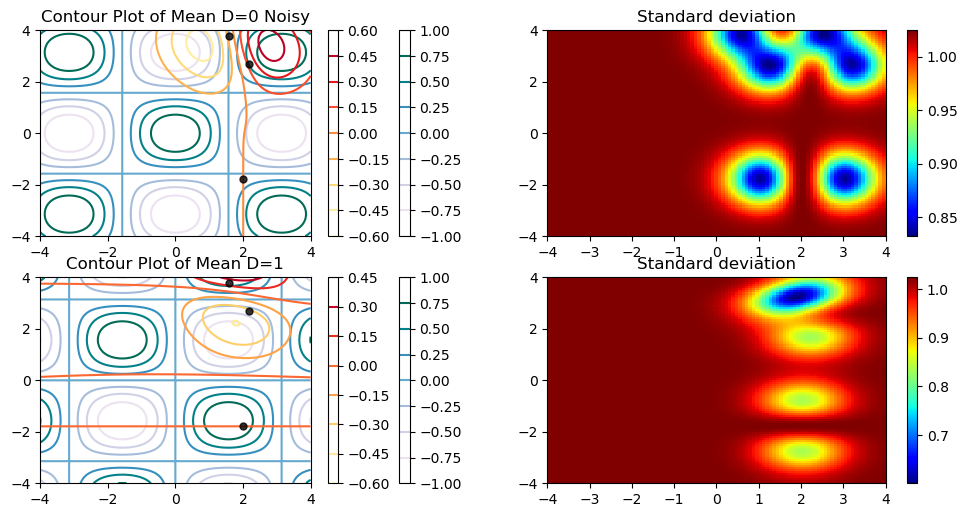

0.9995231724991412


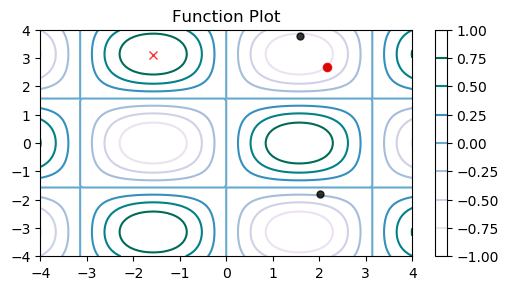

0
recommended x=[1.72590268 2.95521638] current y=-0.985, ymax=-0.177


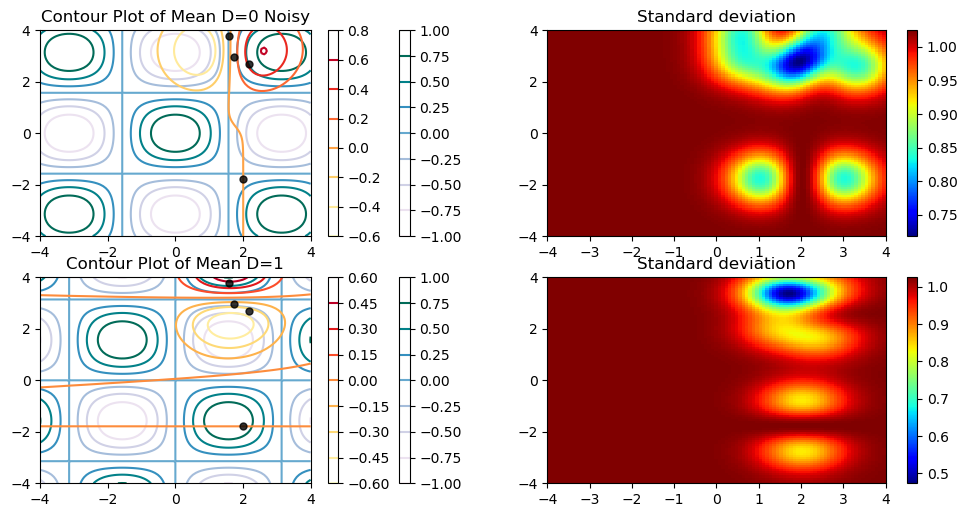

0.9995231724991412


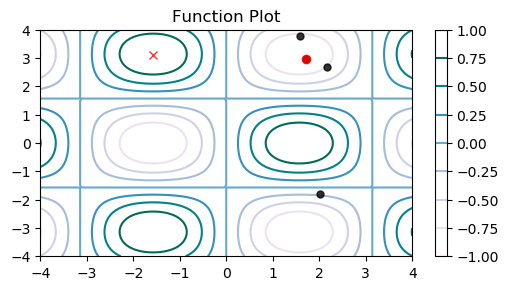

1
recommended x=[1.76782819 2.20350891] current y=-0.578, ymax=-0.177


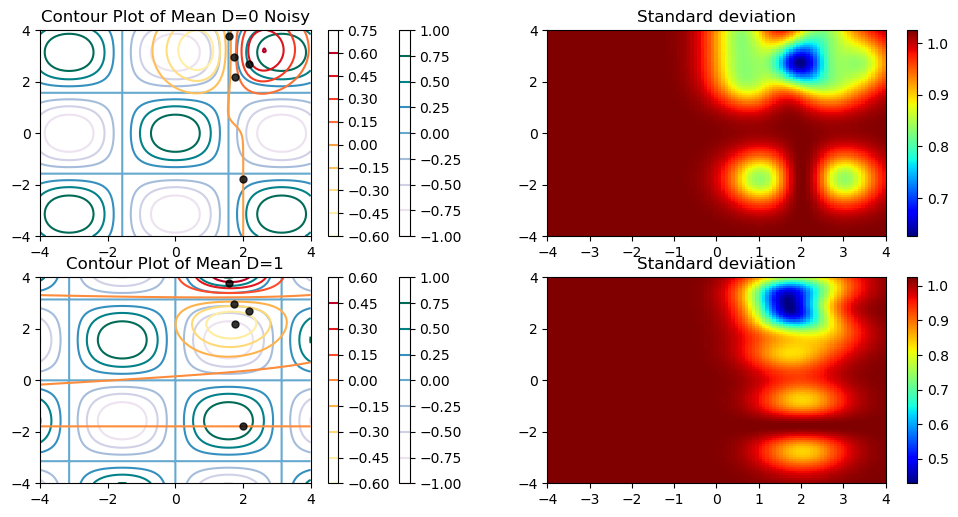

0.9995231724991412


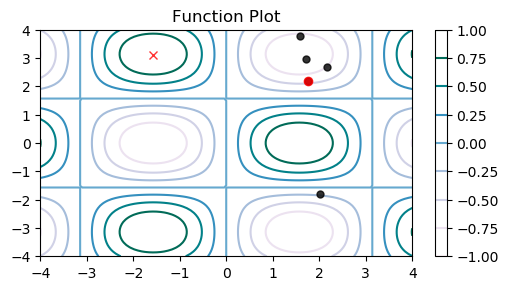

2
recommended x=[1.88418436 0.92654558] current y=0.600, ymax=0.600


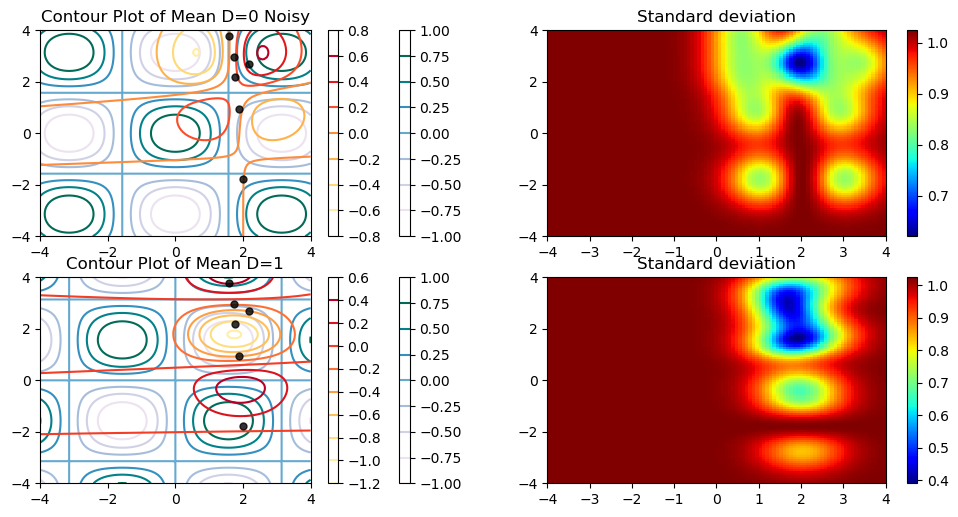

0.9995231724991412


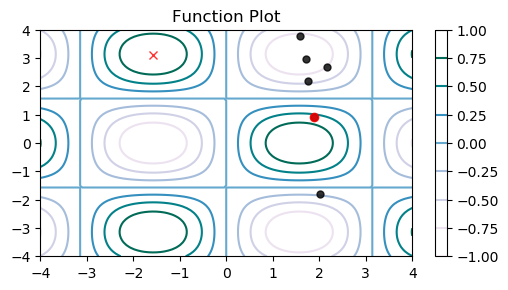

3
recommended x=[1.93113967 0.54798554] current y=0.798, ymax=0.798


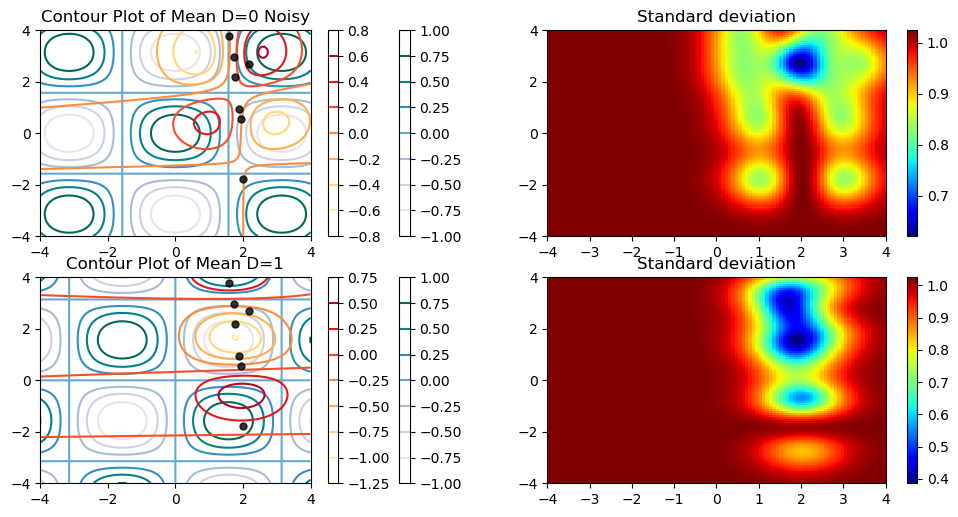

0.9995231724991412


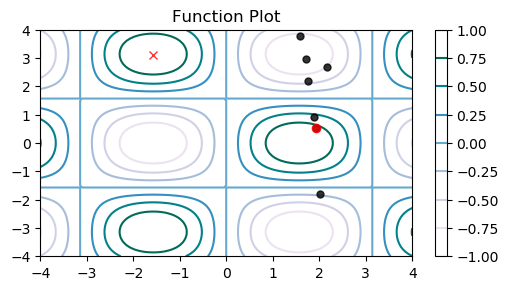

4
recommended x=[1.9441794  0.53986329] current y=0.881, ymax=0.881


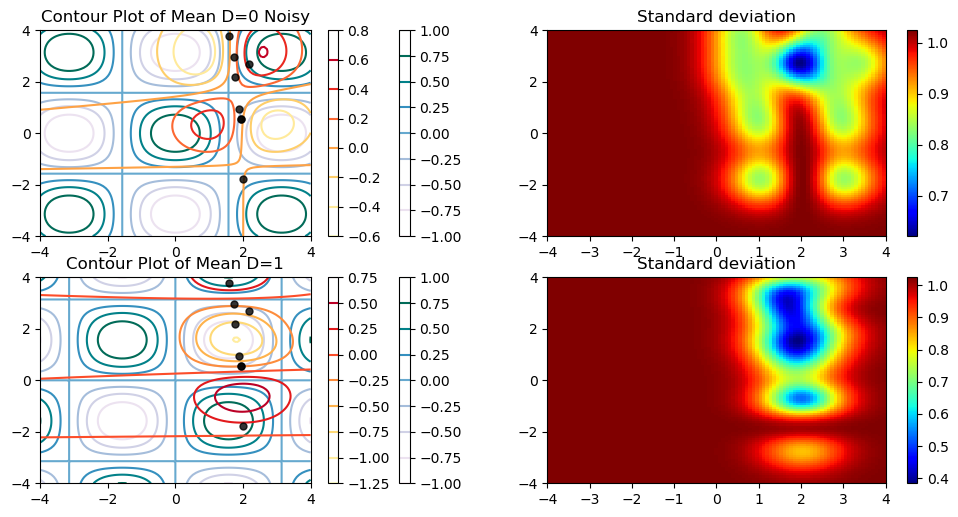

0.9995231724991412


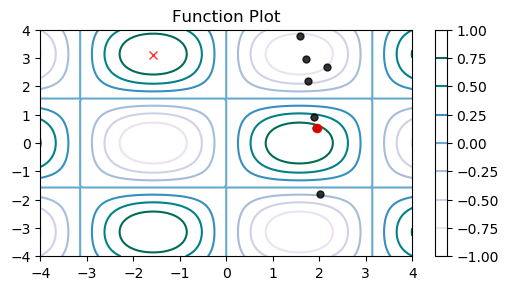

5
recommended x=[2.00946472 0.17187358] current y=0.910, ymax=0.910


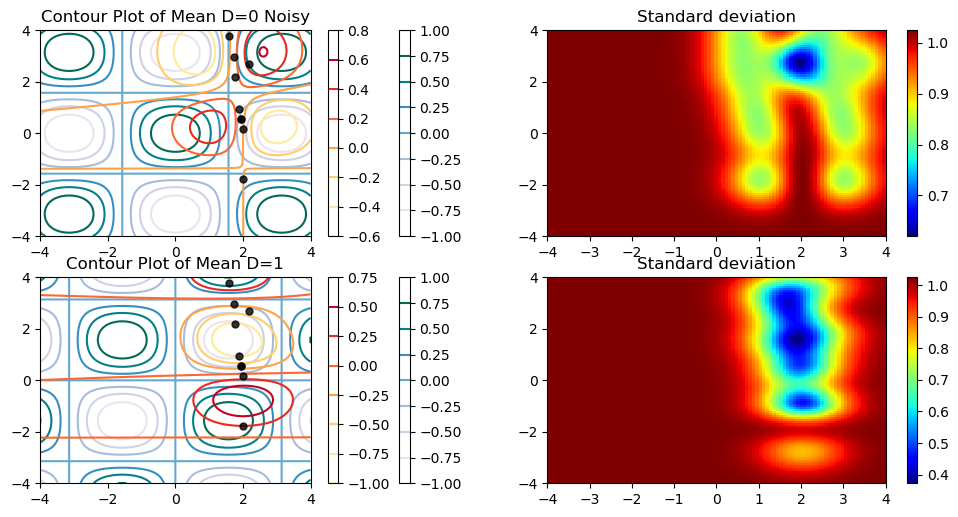

0.9995231724991412


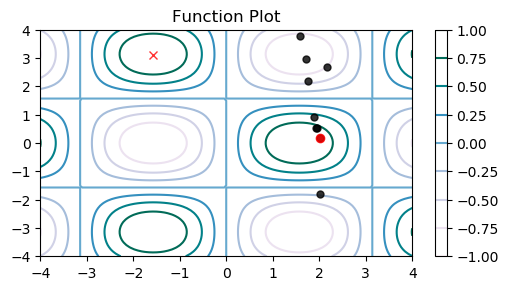

6
recommended x=[1.99148154 0.52575548] current y=0.805, ymax=0.910


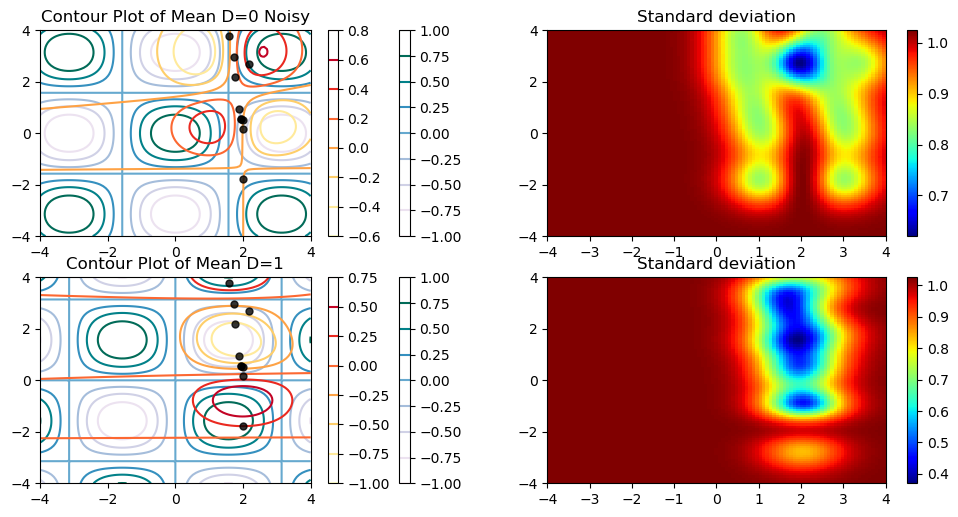

0.9995231724991412


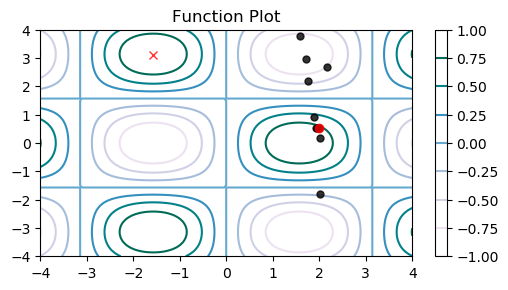

7
recommended x=[ 2.04008787 -0.15711122] current y=0.923, ymax=0.923


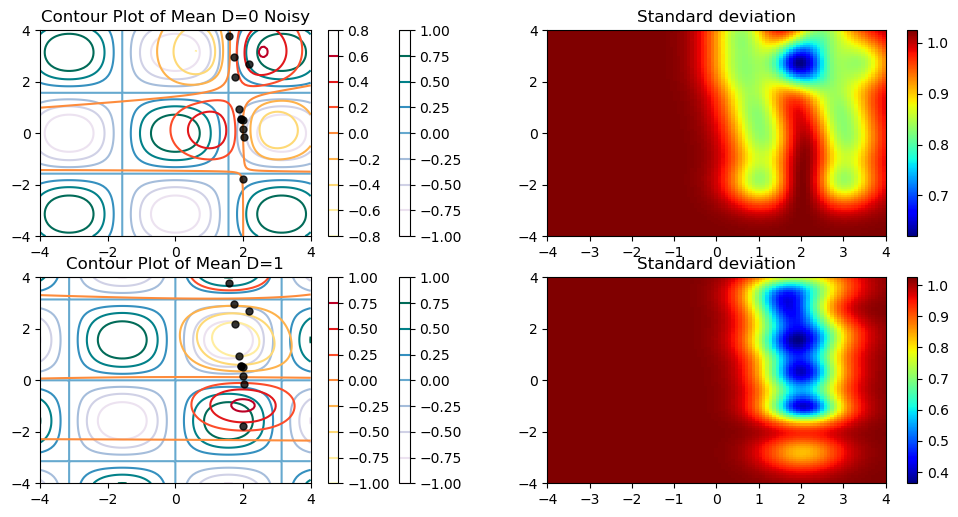

0.9995231724991412


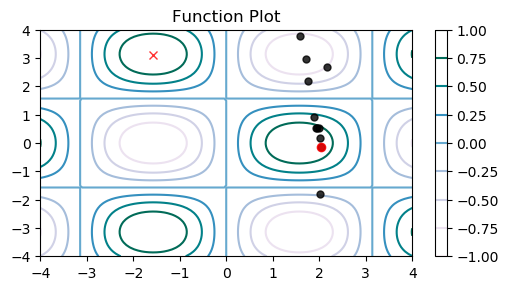

8
recommended x=[2.03243114 0.37120567] current y=0.832, ymax=0.923


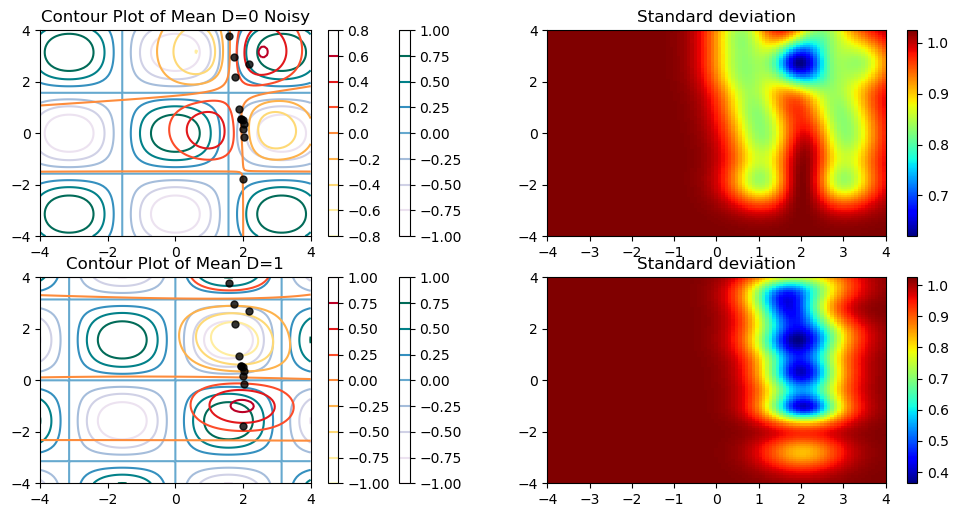

0.9995231724991412


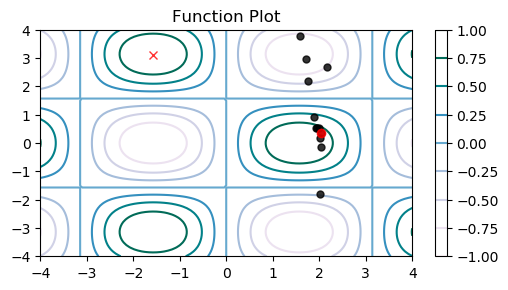

9
recommended x=[ 1.96571095 -0.16492052] current y=0.925, ymax=0.925


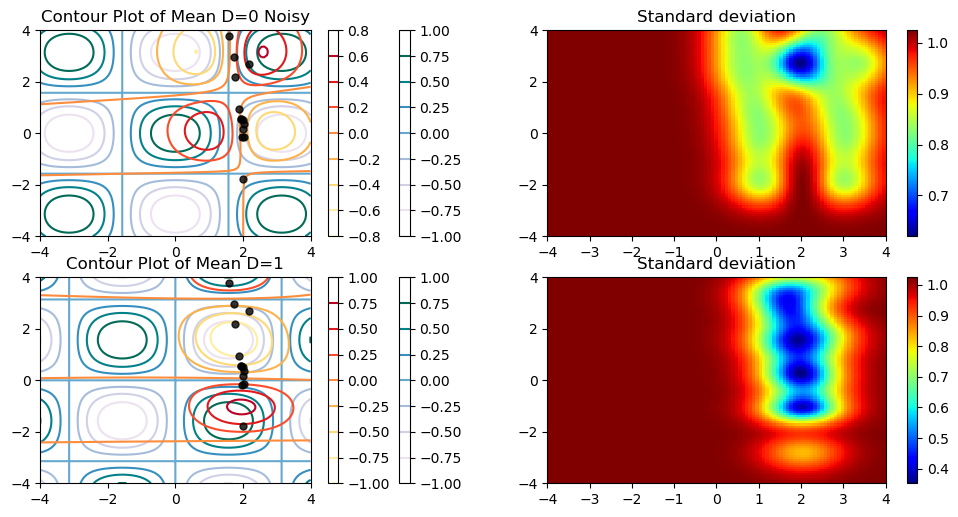

0.9995231724991412


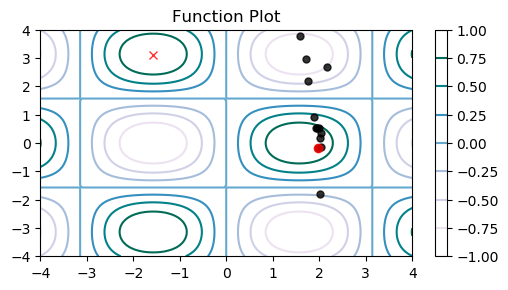

10
recommended x=[1.92522479 0.39512023] current y=0.896, ymax=0.925


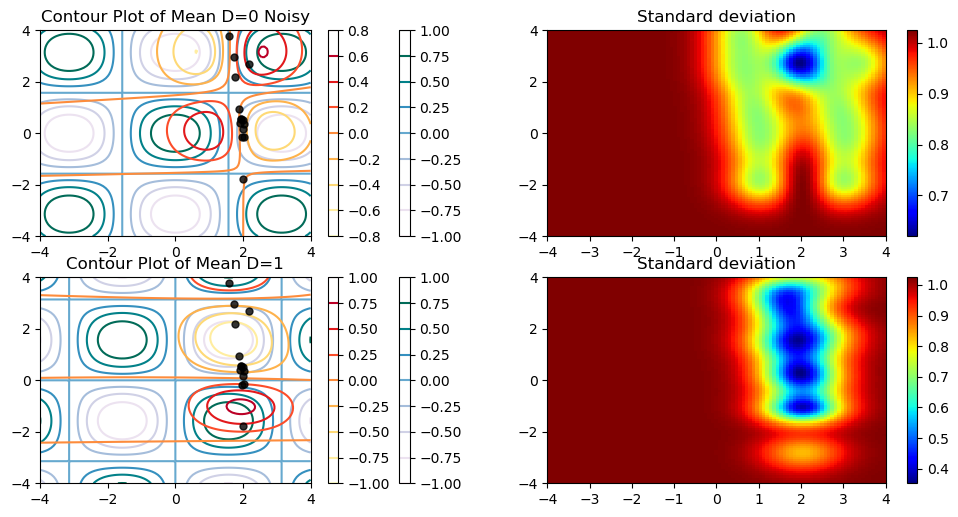

0.9995231724991412


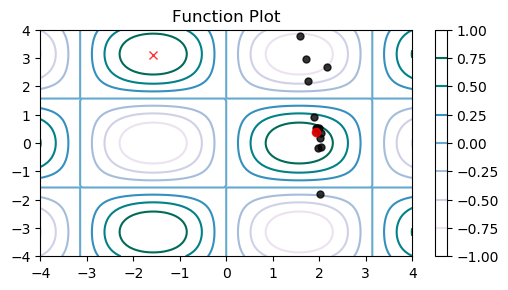

11
recommended x=[ 1.90266691 -0.20114609] current y=0.987, ymax=0.987


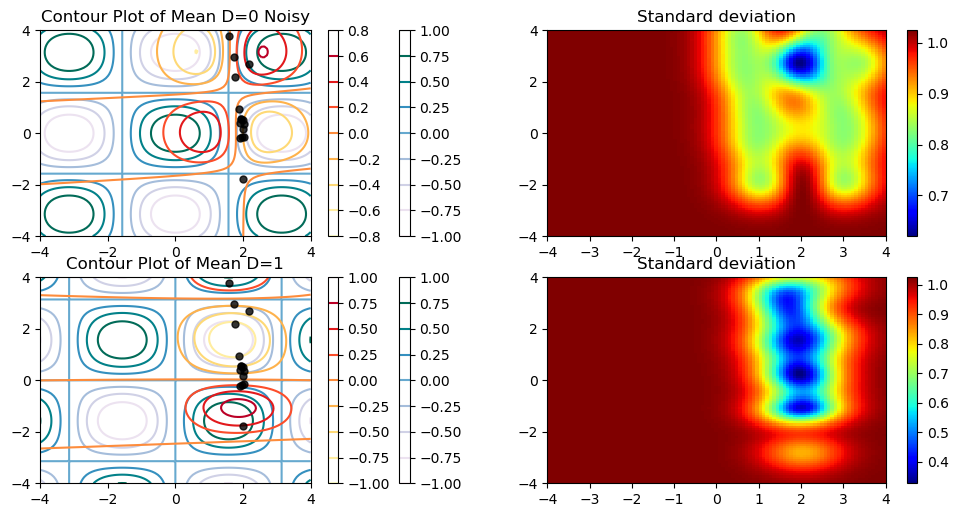

0.9995231724991412


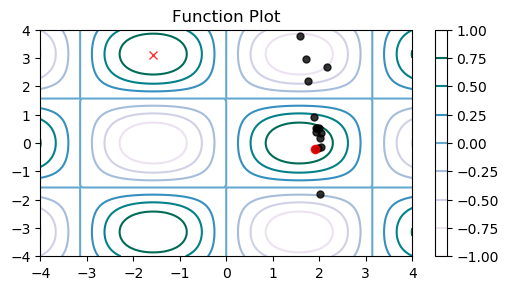

12
recommended x=[1.77325323 0.39534325] current y=0.841, ymax=0.987


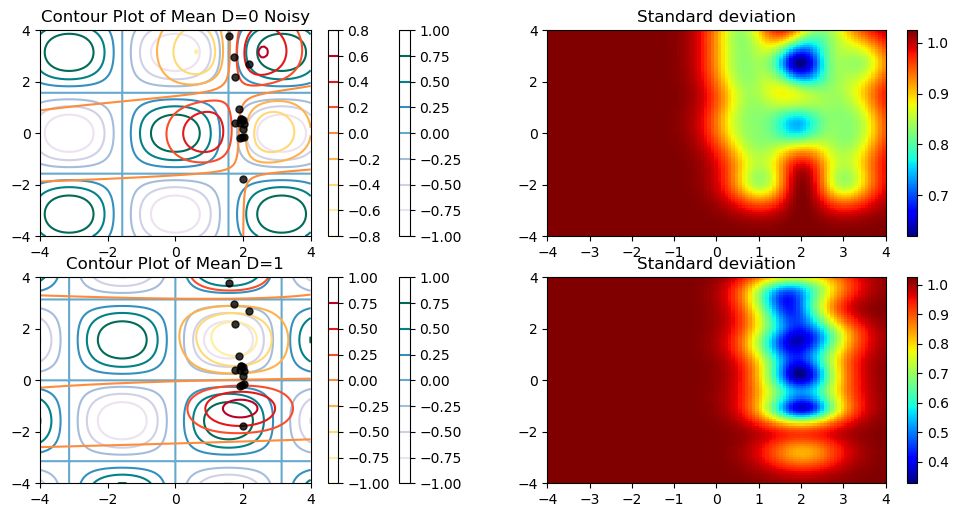

0.9995231724991412


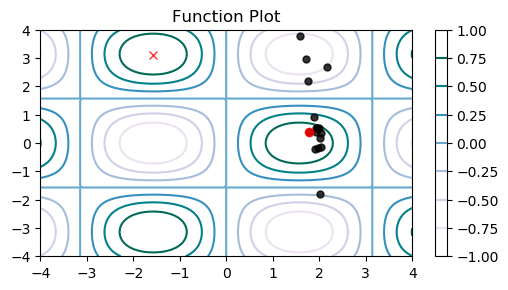

13
recommended x=[ 1.90511638 -0.17658259] current y=0.899, ymax=0.987


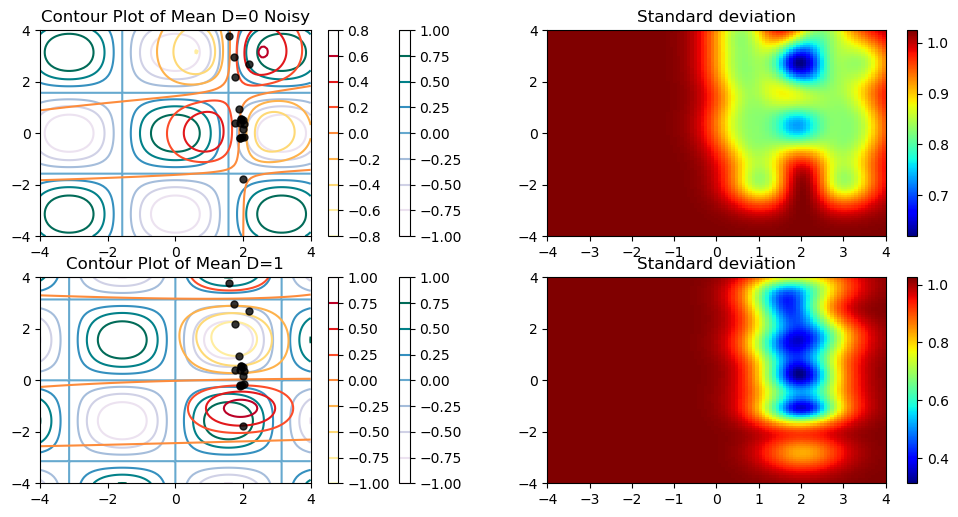

0.9995231724991412


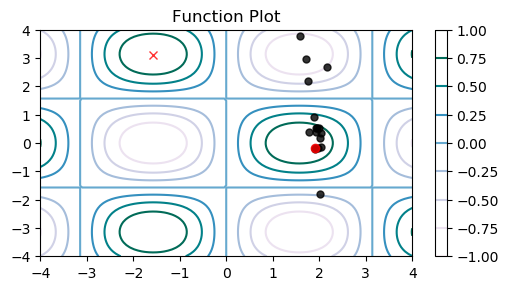

14
recommended x=[1.86070993 0.37026779] current y=0.919, ymax=0.987


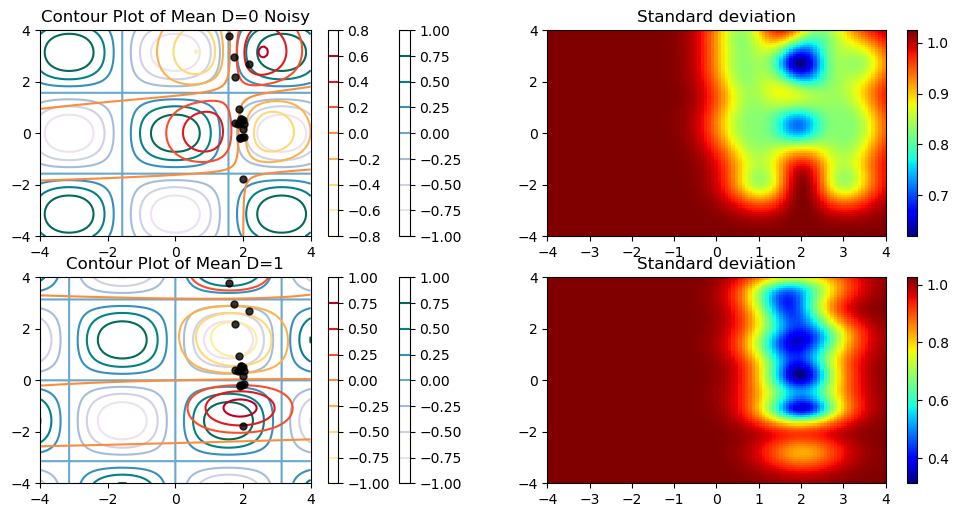

0.9995231724991412


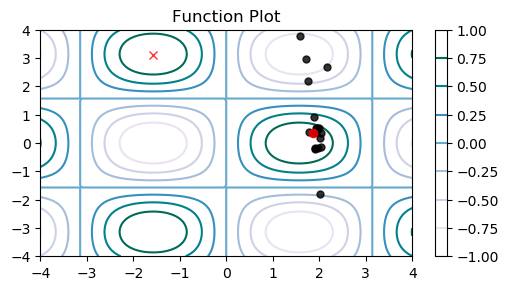

15
recommended x=[ 1.90583126 -0.2075001 ] current y=0.983, ymax=0.987


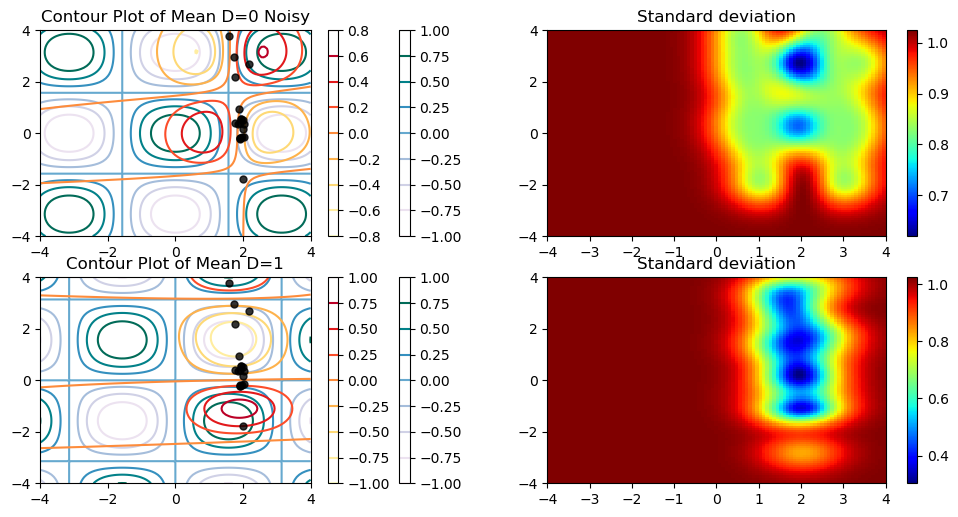

0.9995231724991412


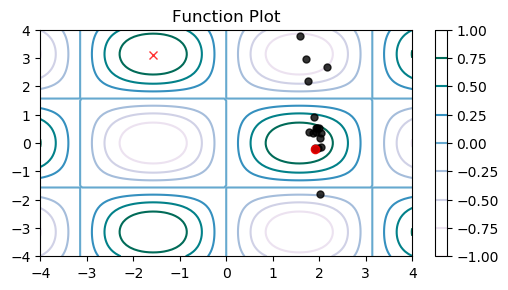

16
recommended x=[1.79954074 0.37814996] current y=0.928, ymax=0.987


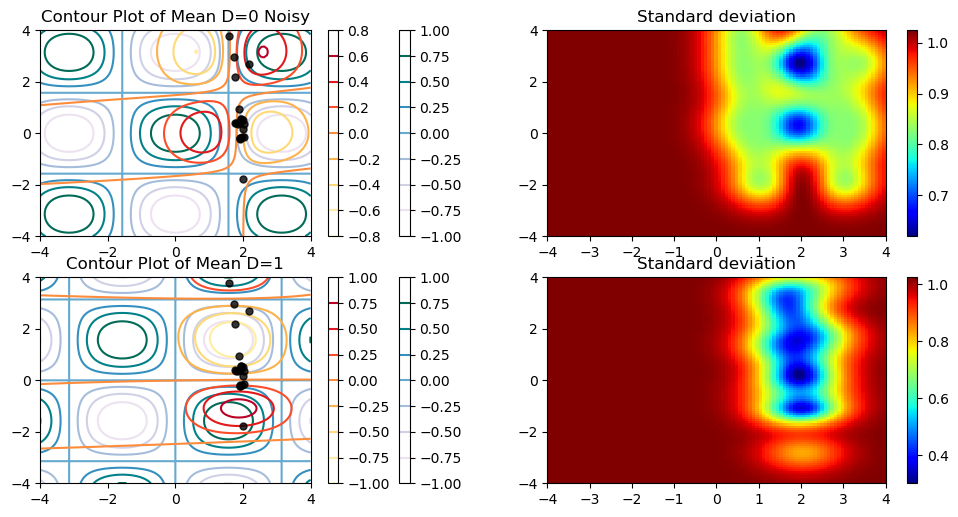

0.9995231724991412


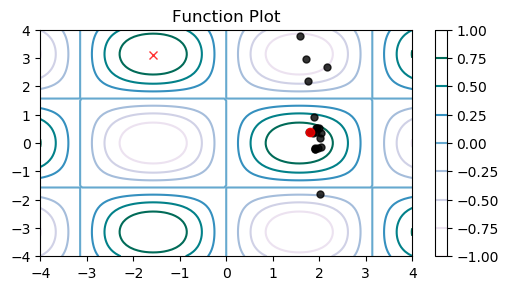

17
recommended x=[ 1.83527178 -0.22206669] current y=0.981, ymax=0.987


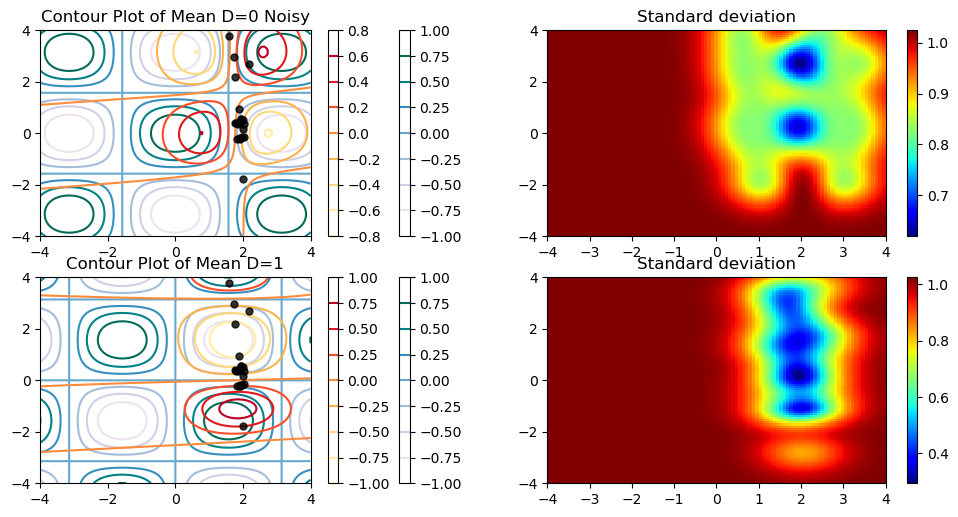

0.9995231724991412


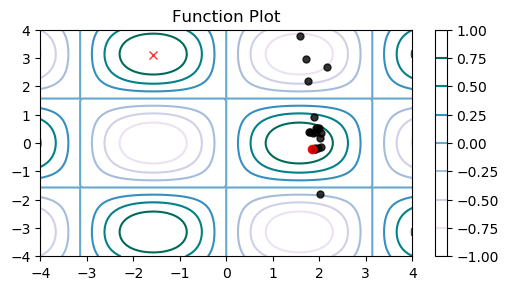

18
recommended x=[1.71125451 0.3851413 ] current y=0.897, ymax=0.987


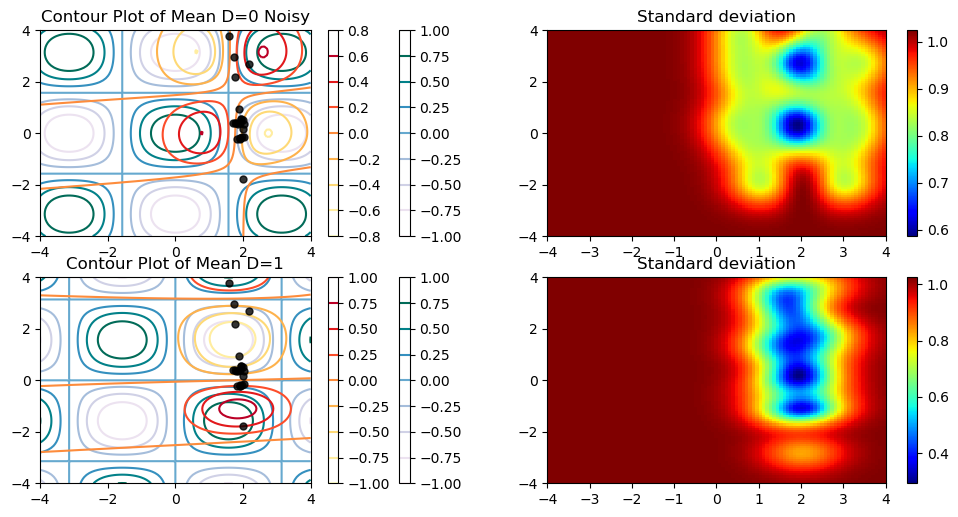

0.9995231724991412


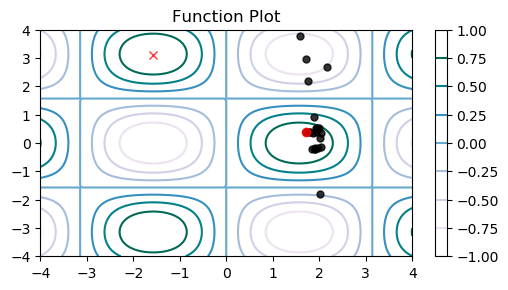

19
recommended x=[ 1.8057004  -0.21616449] current y=0.968, ymax=0.987


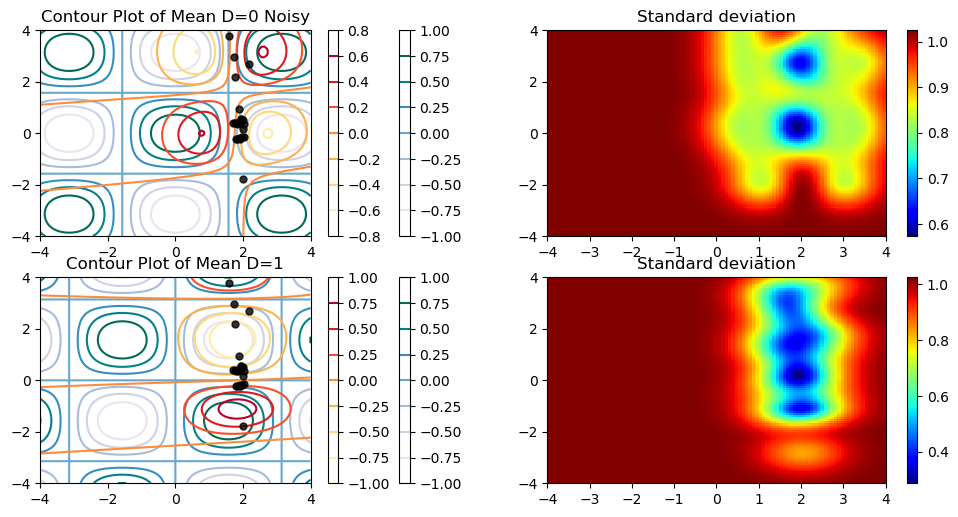

0.9995231724991412


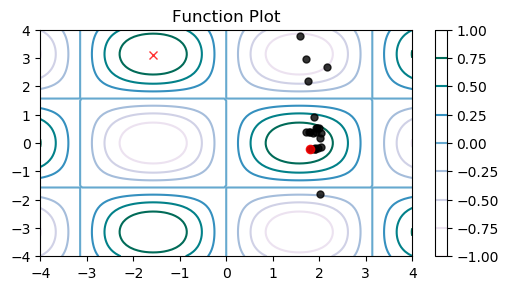

20
recommended x=[1.68288    0.38366998] current y=0.880, ymax=0.987


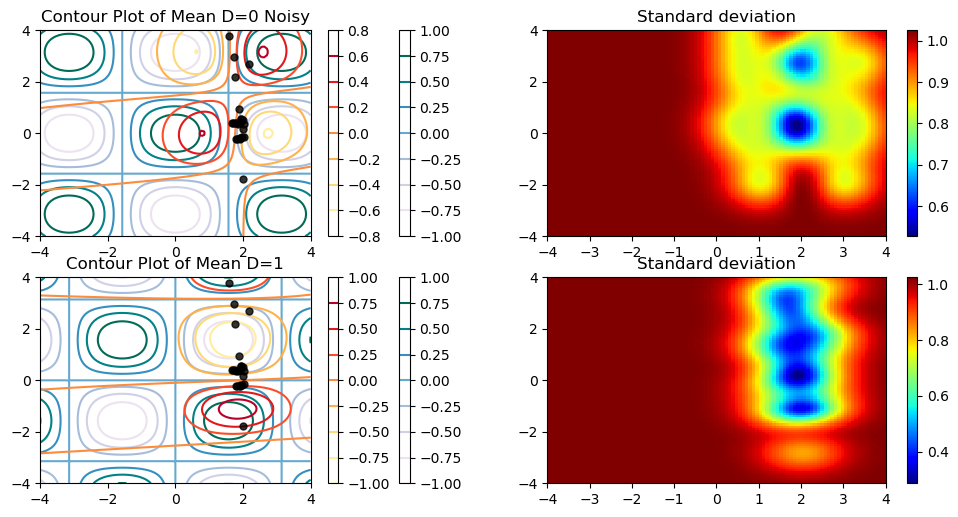

0.9995231724991412


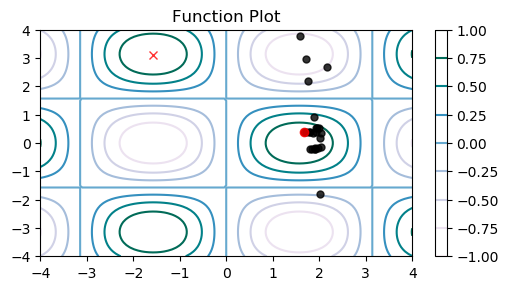

21
recommended x=[ 1.8199796 -0.211978 ] current y=0.967, ymax=0.987


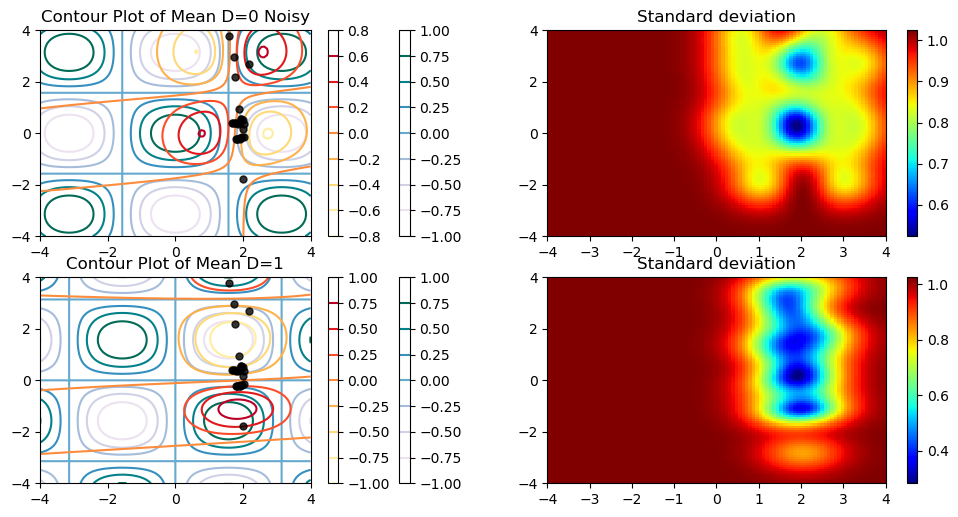

0.9995231724991412


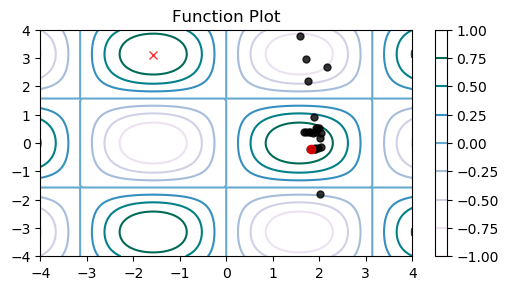

22
recommended x=[1.67412715 0.37681651] current y=0.860, ymax=0.987


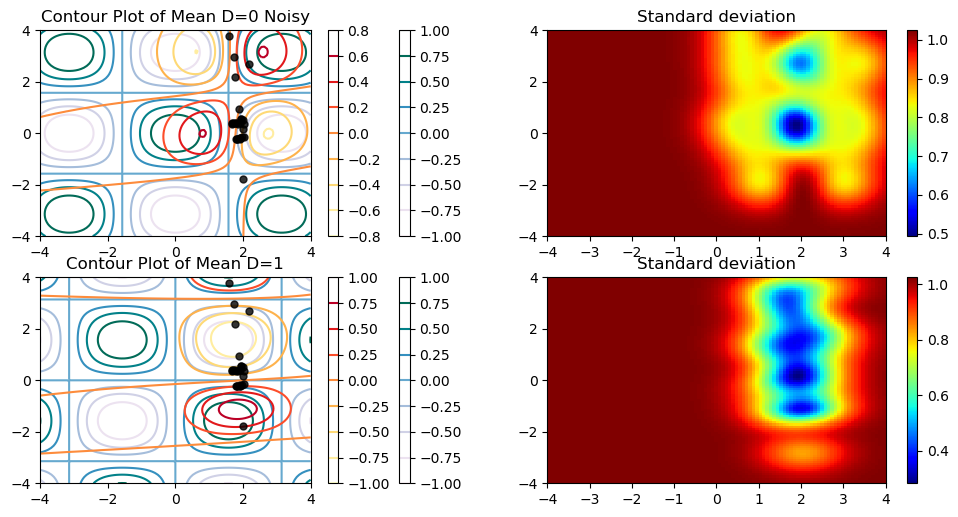

0.9995231724991412


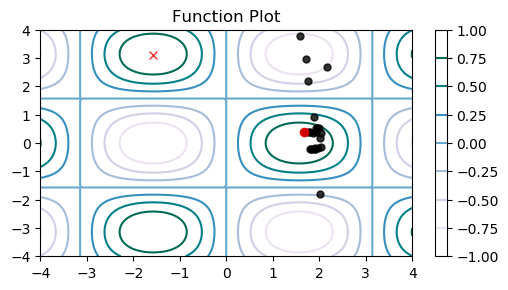

23
recommended x=[ 1.85175085 -0.20264828] current y=0.960, ymax=0.987


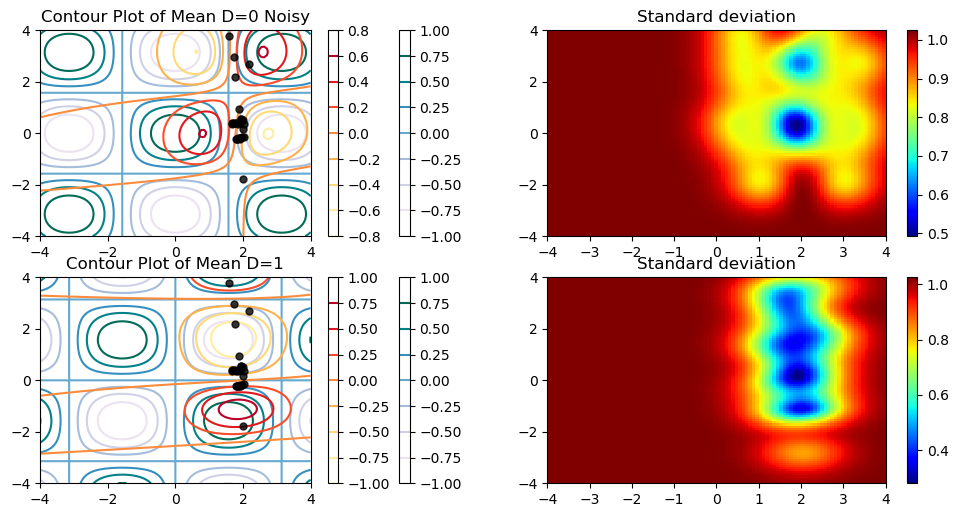

0.9995231724991412


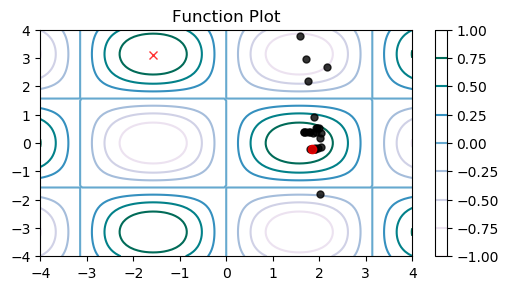

24
recommended x=[1.67778395 0.3645002 ] current y=0.908, ymax=0.987


In [12]:
# creaing object and initalizing the first 3 samples.
seed=np.random.randint(1000, size=1)
Bo_test=GP_action(objective.func,function_bounds,Noise,Noise_level,acquation_function)
Bo_test.initiate(seed,n_random_draws=3)


# runs 1 round of optimization 
i=0
for i in range(0,Budget):
    Bo_test.sample_new_value()
    print("recommended x={} current y={:.3f}, ymax={:.3f}".format(Bo_test.X[-1],Bo_test.Y[-1],Bo_test.Y.max()))
    

In [14]:
# Creates the .gif from the saved plots for the 2D_Plots dir.
noise='Noisy' # Noisy or Noisless
filenames = []
for i in range(0,25):
    filename = 'SinCos_Function_'+str(i)+'_'+noise+'.png'
    filenames.append(filename)
frames=[]
for filename in filenames:
    frames.append(imageio.imread('2D_Plots/'+filename))
exportname = 'SinCos_Function_'+noise+'.gif'
kargs = { 'duration': 0.5 }
imageio.mimsave(exportname, frames, 'GIF', **kargs)